In [1]:
import ast
import math
import random
from typing import Tuple, Union, List

from matplotlib.figure import Figure
from numpy import pi
from qiskit.aqua.algorithms import Grover
from qiskit.aqua.components.oracles import LogicalExpressionOracle, CustomCircuitOracle, Oracle
from qiskit.circuit import classical_function, Int1
from qiskit.circuit.library import *
from qiskit.result import Counts
from qiskit.utils import QuantumInstance
from sympy.codegen import ast

from utils import *

from qiskit import *
from qiskit.extensions import Initialize
from qiskit.visualization import plot_histogram

from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor  
from math import pi

In [2]:
def get_pi_perm(n):
    pi = {}
    set = []
    for i in range(n):
        set.append(i)

    set_len = int(len(set) / 2)
    for i in range(set_len):
        key = random.choice(set)
        set.remove(key)
        value = random.choice(set)
        set.remove(value)
        pi[key] = value
        pi[value] = key
    return pi

# N integer
def get_L(N):
    ret = []
    pi_perm = get_pi_perm(N)
    for i in range(len(pi_perm.keys())):
        ret.append(pi_perm.get(i))
    return ret



In [3]:
def run():
    global L, y, N
    N = 16
    L = get_L(N)
    # L = [3, 5, 8, 0, 6, 1, 4, 13, 2, 15, 12, 14, 10, 7, 11, 9]
    print(f"L = {L}")
    print(f"index containing 0 = {L.index(0)}")
    # y = random.choice(range(N))
    y = L.index(15)
    print(f"Initial index y = {y}")
    # y = 9
    m = 15

In [4]:
run()

L = [4, 8, 10, 11, 0, 6, 5, 13, 1, 15, 2, 3, 14, 7, 12, 9]
index containing 0 = 4
Initial index y = 9


In [17]:
from qiskit.quantum_info import Statevector, DensityMatrix, Operator
mark_state = Statevector.from_label('0000')
diffuse_operator = 2 * DensityMatrix.from_label('0000') - Operator.from_label('IIII')
grover_op = GroverOperator(oracle=mark_state, zero_reflection=diffuse_operator)
diffuse_operator.draw(output='text')

[[ 1.+0.j, 0.+0.j, 0.+0.j,..., 0.+0.j, 0.+0.j, 0.+0.j],
 [ 0.+0.j,-1.+0.j, 0.+0.j,..., 0.+0.j, 0.+0.j, 0.+0.j],
 [ 0.+0.j, 0.+0.j,-1.+0.j,..., 0.+0.j, 0.+0.j, 0.+0.j],
 ...,
 [ 0.+0.j, 0.+0.j, 0.+0.j,...,-1.+0.j, 0.+0.j, 0.+0.j],
 [ 0.+0.j, 0.+0.j, 0.+0.j,..., 0.+0.j,-1.+0.j, 0.+0.j],
 [ 0.+0.j, 0.+0.j, 0.+0.j,..., 0.+0.j, 0.+0.j,-1.+0.j]]

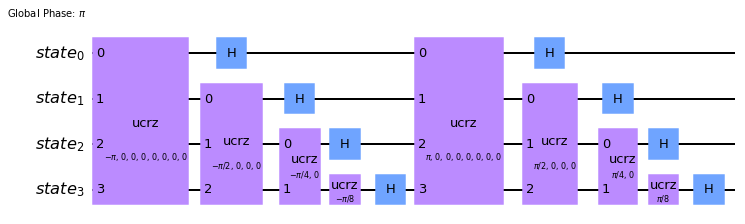

In [18]:
grover_op.draw(output='mpl')

In [19]:
S_simulator = Aer.get_backend('statevector_simulator')
rslt = execute(grover_op, backend = S_simulator).result()
My_statevector = rslt.get_statevector()
print(My_statevector)

[ 0.875-5.15586711e-16j -0.125+2.67204233e-16j -0.125+1.16841785e-16j
 -0.125+2.41561240e-17j -0.125+1.96908909e-16j -0.125+1.09539353e-16j
 -0.125+9.10204828e-17j -0.125+5.13544294e-17j -0.125-1.78302680e-16j
 -0.125-6.69812976e-18j -0.125+4.61486773e-17j -0.125+1.00392321e-17j
 -0.125-1.07764791e-17j -0.125+3.24103906e-17j -0.125-1.80885524e-17j
 -0.125+1.15947292e-17j]


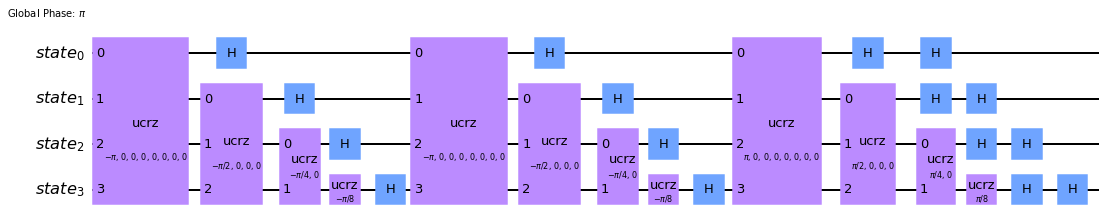

In [20]:
grover_op = GroverOperator(oracle=mark_state, zero_reflection=grover_op)
grover_op.draw(output='mpl')

In [21]:
S_simulator = Aer.get_backend('statevector_simulator')
rslt = execute(grover_op, backend = S_simulator).result()
My_statevector = rslt.get_statevector()
print(My_statevector)

[-0.85818712+0.17070403j -0.12259816+0.02438629j -0.12259816+0.02438629j
 -0.12259816+0.02438629j -0.12259816+0.02438629j -0.12259816+0.02438629j
 -0.12259816+0.02438629j -0.12259816+0.02438629j -0.12259816+0.02438629j
 -0.12259816+0.02438629j -0.12259816+0.02438629j -0.12259816+0.02438629j
 -0.12259816+0.02438629j -0.12259816+0.02438629j -0.12259816+0.02438629j
 -0.12259816+0.02438629j]


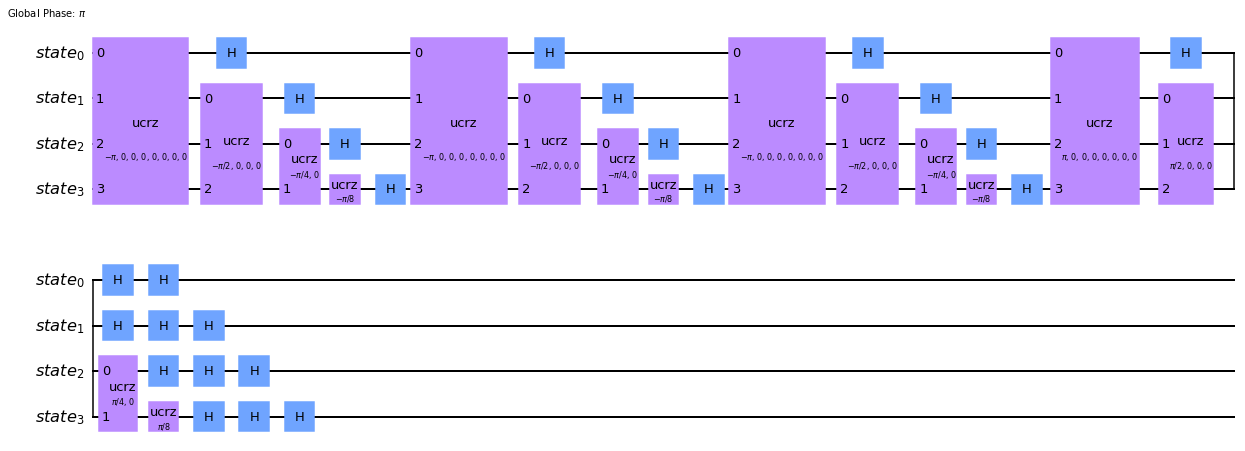

In [22]:
grover_op = GroverOperator(oracle=mark_state, zero_reflection=grover_op)
grover_op.draw(output='mpl')

In [23]:
S_simulator = Aer.get_backend('statevector_simulator')
rslt = execute(grover_op, backend = S_simulator).result()
My_statevector = rslt.get_statevector()
print(My_statevector)

[-0.490811  +0.20330057j  0.20209865-0.083712j    0.20209865-0.083712j
  0.20209865-0.083712j    0.20209865-0.083712j    0.20209865-0.083712j
  0.20209865-0.083712j    0.20209865-0.083712j    0.20209865-0.083712j
  0.20209865-0.083712j    0.20209865-0.083712j    0.20209865-0.083712j
  0.20209865-0.083712j    0.20209865-0.083712j    0.20209865-0.083712j
  0.20209865-0.083712j  ]


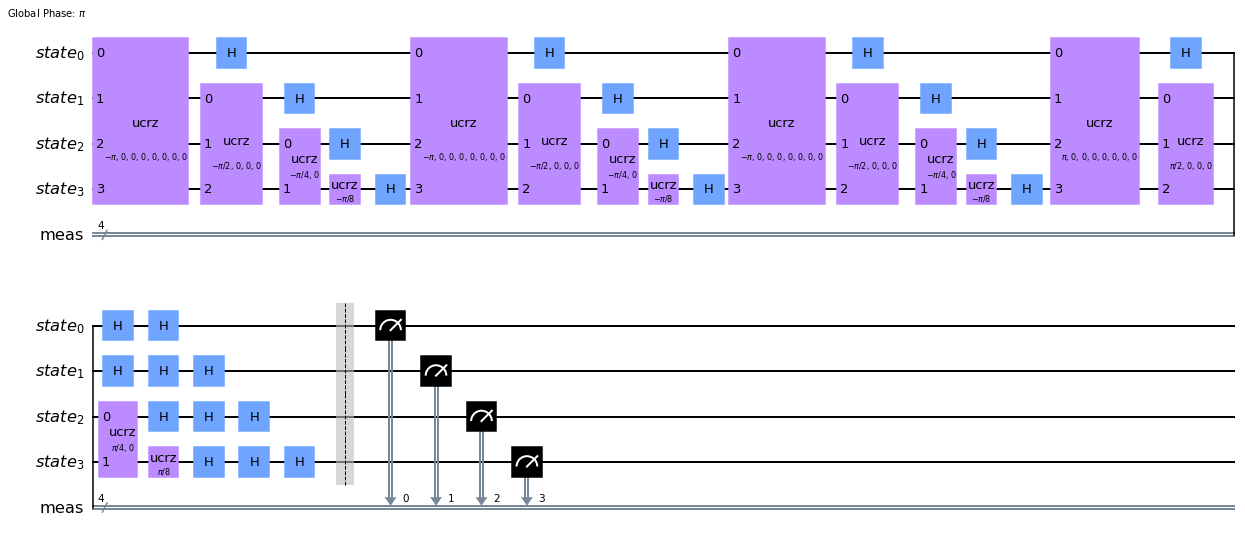

In [24]:
grover_op.measure_all()
grover_op.draw(output='mpl')

Job Status: job has successfully run
RESULT:  {'0010': 461, '0000': 2891, '0101': 486, '1110': 499, '1010': 427, '1001': 473, '0011': 456, '0110': 465, '0001': 486, '1011': 462, '0111': 479, '0100': 470, '1101': 489, '1000': 513, '1111': 464, '1100': 479} 



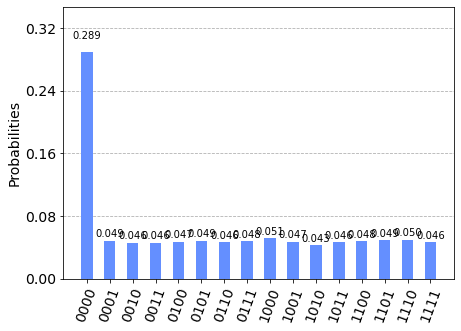

In [25]:
# Running the circuit in ideal environment
simulator = Aer.get_backend('qasm_simulator') 
shots = 10000
job = execute(grover_op, backend=simulator, shots=shots) 
job_monitor(job)
counts = job.result().get_counts()

print('RESULT: ',counts,'\n')
plot_histogram(counts)